In [1]:
import os
import numpy as np
# File manipulation
import glob

import matplotlib.pyplot as plt
import matplotlib as mpl

import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import vegetation 

In [2]:
os.getcwd()

'/Users/shannonwhite/git/volcano-risk-analysis/notebooks'

In [3]:
os.chdir('/Users/shannonwhite/git')

In [4]:
!ls data/Landsat/2018/LC080620472018051401T1-SC20190225153920

LC08_L1TP_062047_20180514_20180604_01_T1.xml
LC08_L1TP_062047_20180514_20180604_01_T1_ANG.txt
LC08_L1TP_062047_20180514_20180604_01_T1_MTL.txt
LC08_L1TP_062047_20180514_20180604_01_T1_pixel_qa.tif
LC08_L1TP_062047_20180514_20180604_01_T1_radsat_qa.tif
LC08_L1TP_062047_20180514_20180604_01_T1_sr_aerosol.tif
LC08_L1TP_062047_20180514_20180604_01_T1_sr_band1.tif
LC08_L1TP_062047_20180514_20180604_01_T1_sr_band2.tif
LC08_L1TP_062047_20180514_20180604_01_T1_sr_band3.tif
LC08_L1TP_062047_20180514_20180604_01_T1_sr_band4.tif
LC08_L1TP_062047_20180514_20180604_01_T1_sr_band5.tif
LC08_L1TP_062047_20180514_20180604_01_T1_sr_band6.tif
LC08_L1TP_062047_20180514_20180604_01_T1_sr_band7.tif


In [5]:
post_landsat_bands1 = glob.glob ("/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/*band*")
post_landsat_bands1

['/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band1.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band2.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band3.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band7.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band6.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band4.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band5.tif']

In [6]:
post_landsat_bands1.sort()
post_landsat_bands1

['/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band1.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band2.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band3.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band4.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band5.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band6.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018051401T1-SC20190225153920/LC08_L1TP_062047_20180514_20180604_01_T1_sr_band7.tif']

In [7]:
landsat_post1_path = "data/Landsat/2018/outputs/landsat_post.tif"
land_stack1, land_meta1 = es.stack_raster_tifs(post_landsat_bands1,
                                             landsat_post1_path)

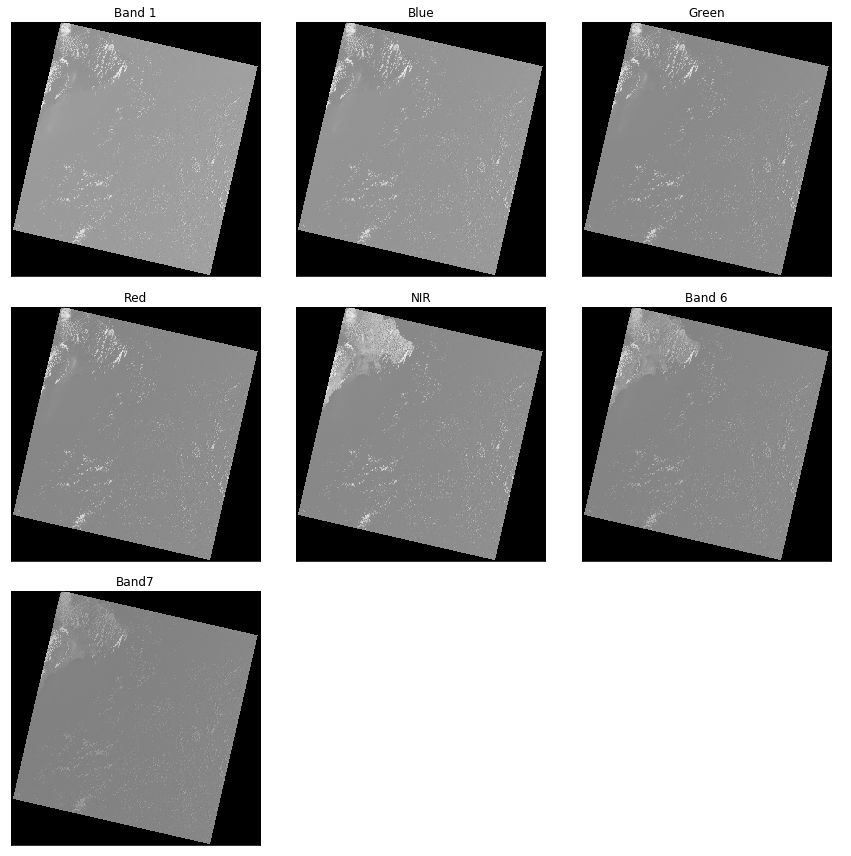

(<Figure size 864x864 with 9 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1247dfeb8>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x1966d3438>]], dtype=object))

In [8]:
with rio.open(landsat_post1_path) as scene1:
    landsat_post1 = scene1.read()

# Plot all bands using earthpy
band_titles = ["Band 1", "Blue", "Green", "Red", "NIR",
               "Band 6", "Band7"]
es.plot_bands(landsat_post1,
              title=band_titles,
              cmap="Greys_r")

In [9]:
#es.plot_rgb(landsat_post1,
            #rgb=[3, 2, 1],
            
            #title="RGB Composite Image\n Post Eruption May 15 2018 Landsat Data")

In [10]:
#es.hist(landsat_post1,
        #title=band_titles)

In [11]:
#es.plot_rgb(landsat_post1, rgb=[4, 3, 2],
            #title="CIR Landsat Image",
            #figsize=(10, 10))

In [12]:
os.listdir("/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217")

['LC08_L1TP_062047_20180701_20180716_01_T1_ANG.txt',
 'LC08_L1TP_062047_20180701_20180716_01_T1_sr_band1.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_sr_band3.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_sr_band2.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_sr_band6.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_sr_band7.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_sr_band5.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_radsat_qa.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_sr_band4.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_pixel_qa.tif',
 'LC08_L1TP_062047_20180701_20180716_01_T1_MTL.txt',
 'LC08_L1TP_062047_20180701_20180716_01_T1.xml',
 'LC08_L1TP_062047_20180701_20180716_01_T1_sr_aerosol.tif']

In [13]:
post_landsat_bands2 = glob.glob ("/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217/*band*")
post_landsat_bands2

['/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217/LC08_L1TP_062047_20180701_20180716_01_T1_sr_band1.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217/LC08_L1TP_062047_20180701_20180716_01_T1_sr_band3.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217/LC08_L1TP_062047_20180701_20180716_01_T1_sr_band2.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217/LC08_L1TP_062047_20180701_20180716_01_T1_sr_band6.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217/LC08_L1TP_062047_20180701_20180716_01_T1_sr_band7.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217/LC08_L1TP_062047_20180701_20180716_01_T1_sr_band5.tif',
 '/Users/shannonwhite/git/data/Landsat/2018/LC080620472018070101T1-SC20190225150217/LC08_L1TP_062047_20180701_20180716_01_T1_sr_band4.tif']

In [14]:
post_landsat_bands2.sort()

In [15]:
landsat_post2_path = "data/Landsat/2018/outputs/landsat_post2.tif"
land_stack2, land_meta2 = es.stack_raster_tifs(post_landsat_bands2,
                                             landsat_post2_path)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b6bac550>)

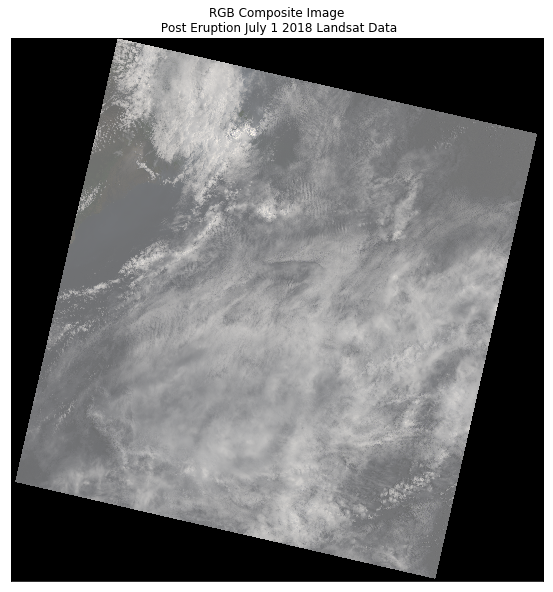

In [18]:
with rio.open(landsat_post2_path) as scene2:
    landsat_post2 = scene2.read()

es.plot_rgb(landsat_post2,
            rgb=[3, 2, 1],
            
            title="RGB Composite Image\n Post Eruption July 1 2018 Landsat Data")

In [20]:
post_landsat_bands3 = glob.glob ("/Users/shannonwhite/git/data/Landsat/2018/LC080620472018080201T1-SC20190225150243/*band*")

In [21]:
post_landsat_bands3.sort()

In [22]:
landsat_post3_path = "data/Landsat/2018/outputs/landsat_post3.tif"
land_stack3, land_meta3 = es.stack_raster_tifs(post_landsat_bands3,
                                             landsat_post3_path)

with rio.open(landsat_post3_path) as scene3:
    landsat_post3 = scene3.read()

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124840710>)

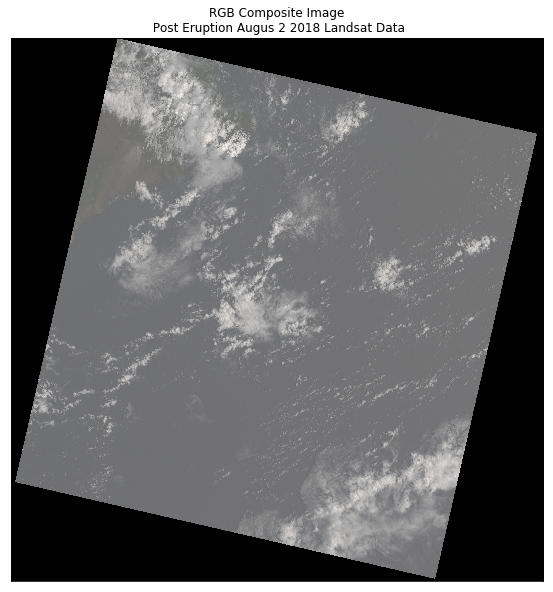

In [23]:

es.plot_rgb(landsat_post3,
            rgb=[3, 2, 1],
            
            title="RGB Composite Image\n Post Eruption Augus 2 2018 Landsat Data")

In [24]:
post_landsat_bands4 = glob.glob ("/Users/shannonwhite/git/data/Landsat/2018/LC080620472018081801T2-SC20190225150323/*band*")

In [25]:
post_landsat_bands4.sort()

In [26]:
landsat_post4_path = "data/Landsat/2018/outputs/landsat_post4.tif"
land_stack4, land_meta4 = es.stack_raster_tifs(post_landsat_bands4,
                                             landsat_post4_path)

with rio.open(landsat_post4_path) as scene4:
    landsat_post4 = scene4.read()

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124845d30>)

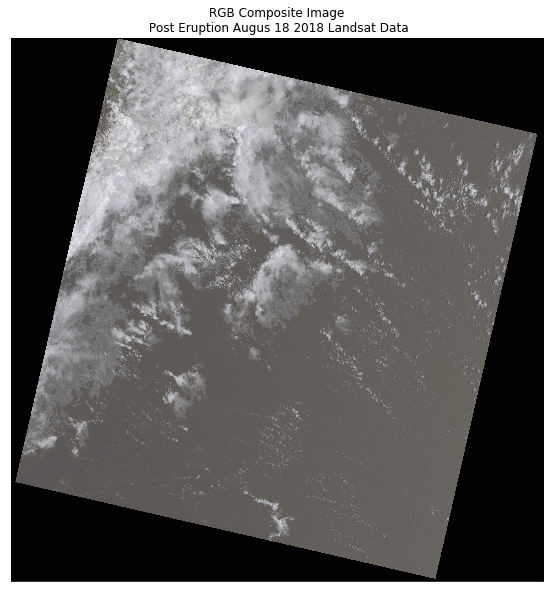

In [27]:

es.plot_rgb(landsat_post4,
            rgb=[3, 2, 1],
            
            title="RGB Composite Image\n Post Eruption Augus 18 2018 Landsat Data")